In [1]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from gensim.models import LdaModel
import pandas as pd
import ecopy as ep
import seaborn as sns

In [2]:
nTopics = 45

In [3]:
topic_names = [
'Water Quality',
'Sediment Transport',
'Wastewater Treatment',
'Flood Risk & Assessment',
'Hydrogeology',
'Coastal Hydrology', 
'River Flow',
'Wetland & Ecology',
'Runoff Quality',
'Rainfall-Runoff',
'Urban Drainage',
'Systems Hydrology',
'Surface-GW Interactions',
'Irrigation Water Management',
'Drought & Water Scarcity',
'Climate Change Impacts',
'Gauging & Monitoring',
'Forecasting',
'Glaciology',
'Salinity',
'Peatlands Mapping & Monitoring',
'Spatial Variability',
'Land Surface Flux',
'Solute Transport',
'Water Resources Management',
'Numerical Modeling',
'Hydrochemistry',
'Pollutant Removal',
'Groundwater Recharge',
'Uncertainty',
'Land Cover',
'Modeling & Calibration',
'Soil Moisture',
'Water Storage & Budgeting',
'Aquifers & Abstraction',
'Microbiology',
'Streamflow',
'Erosion',
'Dynamic Processes',
'Temporal Variability',
'Spatial Variability of Precipitation',
'Rainfall Intensity & Measurement',
'Watershed Hydrology',
'Hydraulics',
'Quantitative Analysis',
]

In [4]:
topic_names_short = [
'WQ',
'SDT',
'WT',
'FRA',
'HG',
'CH', 
'RF',
'WE',
'RQ',
'RR',
'UD',
'SH',
'SGW',
'IWM',
'DWS',
'CC',
'GM',
'FC',
'GL',
'SN',
'PM',
'SV',
'LSF',
'SLT',
'WRM',
'NM',
'HC',
'PR',
'GWR',
'UC',
'LC',
'MDC',
'SM',
'WSB',
'AA',
'MCB',
'SF',
'ER',
'DP',
'TV',
'SVP',
'RIM',
'WH',
'HDR',
'QA',
]

In [5]:
# Define colors to associate with each topic
custom_colors = {
 'burlywood': '#DEB887',
 'chocolate': '#D2691E',
 'crimson': '#DC143C',
 'darkgreen': '#006400',
 'darkorange': '#FF8C00',
 'darkslategrey': '#2F4F4F',
 'deepskyblue': '#00BFFF',
 'dimgray': '#696969',
 'firebrick': '#B22222',
 'gold': '#FFD700',
 'goldenrod':'#DAA520',
 'lawngreen':'#7CFC00',
 'rosybrown':'#BC8F8F',
 'mediumslateblue':'#7B68EE',
 'mediumvioletred': '#C71585',
 'orangered': '#FF4500',
 'orchid': '#DA70D6',
 'royalblue': '#4169E1',
 'slateblue': '#6A5ACD',
 'springgreen': '#00FF7F',
 'steelblue': '#4682B4',
 'teal': '#008080',
 'turquoise': '#40E0D0',
 'yellow': '#FFFF00',
 'blueviolet': '#8A2BE2',
 'yellowgreen': '#9ACD32',
 'mistyrose': '#FFE4E1',
 'royalblue': '#4169E1',
 'lavender':  '#E6E6FA',
 'seashell': '#FFF5EE',
 'coral':'#FF7F50',
 'magenta':'#FF00FF',
 'moccasin':'#FFE4B5',
 'navy':'#000080',
 'paleturquoise':'#AFEEEE',
 'aliceblue':'#F0F8FF',
 'azure':'#F0FFFF',
 'khaki':'#F0E68C',
 'lightseagreen':'#20B2AA',
 'linen':'#FAF0E6',
 'palevioletred':'#DB7093',
 'sienna':'#A0522D',
 'mediumspringgreen':'#00FA9A',
 'indianred':'#CD5C5C',
 'tomato': '#FF6347',
}

# turn into a list
colorlist = []
for color in custom_colors.values():
    colorlist.append(tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)))

In [6]:
# color_key_dict = {
# 'Water Quality':'burlywood',
# 'Sediment Transport':'chocolate',
# 'Wastewater Treatment':'crimson',
# 'Flood Risk & Assessment':'darkgreen',
# 'Hydrogeology':'darkorange',
# 'Coastal Hydrology':'darkslategrey', 
# 'River Flow':'deepskyblue',
# 'Wetland & Ecology':'dimgray',
# 'Runoff Quality':'firebrick',
# 'Rainfall-Runoff':'gold',
# 'Urban Drainage':'goldenrod',
# 'Systems Hydrology':'lawngreen',
# 'Surface-GW Interactions':'rosybrown',
# 'Irrigation Water Management':'mediumslateblue',
# 'Drought & Water Scarcity':'mediumvioletred',
# 'Climate Change Impacts':'orangered',
# 'Gauging & Monitoring':'orchid',
# 'Forecasting':'royalblue',
# 'Glaciology':'slateblue',
# 'Salinity':'springgreen',
# 'Peatlands Mapping & Monitoring':'steelblue',
# 'Spatial Variability':'teal',
# 'Land Surface Flux':'turquoise',
# 'Solute Transport':'yellow',
# 'Water Resources Management':'blueviolet',
# 'Numerical Modeling':'yellowgreen',
# 'Hydrochemistry':'mistyrose',
# 'Pollutant Removal':'royalblue',
# 'Groundwater Recharge':'lavender',
# 'Uncertainty':'seashell',
# 'Land Cover':'coral',
# 'Modeling & Calibration':'magenta',
# 'Soil Moisture':'moccasin',
# 'Water Storage & Budgeting':'navy',
# 'Aquifers & Abstraction':'paleturquoise',
# 'Microbiology':'aliceblue',
# 'Streamflow':'azure',
# 'Erosion':'khaki',
# 'Dynamic Processes':'lightseagreen',
# 'Temporal Variability':'linen',
# 'Spatial Variability of Precipitation':'palevioletred',
# 'Rainfall Intensity & Measurement':'sienna',
# 'Watershed Hydrology':'mediumspringgreen',
# 'Hydraulics':'indianred',
# 'Quantitative Analysis':'tomato',
# }



In [7]:
# Load model

lda_model = LdaModel.load(f'trained_models/trained_lda_model_new_{nTopics}')



# Load topic distributions

topic_distributions = np.load(f'data/topic_distributions_broad_{lda_model.num_topics}.npy')



# Pull topics

topics = lda_model.show_topics(formatted=False, num_topics=nTopics, num_words=20)



# load raw corpus dataframe

with open('data/raw_corpus_broad.pkl', 'rb') as f:
    corpus_df = pkl.load(f)

In [8]:
# Pull journals

journals = corpus_df.Journal.unique()



# Pull years

years = np.unique(corpus_df['Year'])

In [9]:
# Create a dictionary of topic distributions by year
#topic_distributions_year['Year'][paper][topic_weights]

topic_distributions_year = {}

for y, year in enumerate(years):
    
    topic_distributions_year[year] = topic_distributions[corpus_df['Year'] == year]



In [10]:
# Create a dictionary of topic distributions by journal
# topic_distributions_journal['Journal'][paper][topic_weights]

topic_distributions_journal = {}

for j, journal in enumerate(journals):
    
    topic_distributions_journal[journal] = topic_distributions[corpus_df['Journal'] == journal]
    

In [11]:
# Create a dictionary of topic distributions by year & journal
# topic_distributions_journal_year['Journal']['Year]'[paper][topic_weights]

topic_distributions_journal_year = {}

for j, journal in enumerate(journals):
    
    topic_distributions_journal_year[journal] = {}
    
    for y, year in enumerate(years):
        
        topic_distributions_journal_year[journal][year] = topic_distributions[(corpus_df['Journal'] == journal) & (corpus_df['Year'] == year)]



In [130]:
# Define a list of diversity metrics for ecopy

diversity_metrics = ['shannon', 'spRich', 'gini-simpson', 'dominance']
diversity_metrics_3 = ['shannon', 'spRich', 'dominance']

In [13]:
# Global diversity metrics
#global_diversity['metric'][paper_diversities]


global_diversity = {}

for metric in diversity_metrics:
    
    global_diversity[metric] = ep.diversity(topic_distributions, method = metric, breakNA=False, num_equiv=False)



In [14]:
# Yearwise diversity metric
# year_diversity['metric']['year'][paper_diversities]

year_diversity = {}


for metric in diversity_metrics:
    
    year_diversity[metric] = {}
    
    for y, year in enumerate(years):
        
        year_diversity[metric][year] = ep.diversity(topic_distributions_year[year], method = metric, breakNA=False, num_equiv=False)



In [15]:
# Journalwise diversity metric
# year_diversity['metric']['journal'][paper_diversities]

journal_diversity = {}

for metric in diversity_metrics:
    
    journal_diversity[metric] = {}
    
    for j, journal in enumerate(journals):
        
        journal_diversity[metric][journal] = ep.diversity(topic_distributions_journal[journal], method = metric, breakNA=False, num_equiv=False)

In [73]:
# #Journal-year diversity metric

journal_year_diversity = {}

for metric in diversity_metrics:
    
    journal_year_diversity[metric] = {}
    
    for j, journal in enumerate(journals):
        
        journal_year_diversity[metric][journal] = {}
        
        for y, year in enumerate(years):
            
            if topic_distributions_journal_year[journal][year].size > 0:
                
                journal_year_diversity[metric][journal][year] = ep.diversity(topic_distributions_journal_year[journal][year], method = metric, breakNA=False, num_equiv=False)

In [84]:
journal_year_mean_diversity = {}

for metric in diversity_metrics:
    
    journal_year_mean_diversity[metric] = {}
    
    for j, journal in enumerate(journals):
        
        journal_year_mean_diversity[metric][journal] = {}
        
        for y, year in enumerate(years):
            #since some journal data are missing for some years
            if topic_distributions_journal_year[journal][year].size > 0:
                
                journal_year_mean_diversity[metric][journal][year] = np.mean(journal_year_diversity[metric][journal][year])

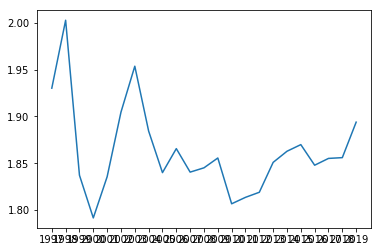

In [92]:
# plt.plot(journal_year_mean_diversity['shannon']['HESS'].keys(), journal_year_mean_diversity['shannon']['HESS'].values())

In [105]:
# #Are the paper diversities in each journal increasing?
# fig = plt.figure(figsize=(250,150), facecolor='white')
# # plt.title('Mean Shannon Diversity Per Journal Per Year', fontsize = 400)

# # plot numbering starts at 1, not 0
# plot_number = 1

# for journal in journals:

#     ax = fig.add_subplot(6, 3, plot_number)
#     ax.plot(journal_year_mean_diversity['shannon'][journal].keys(), journal_year_mean_diversity['shannon'][journal].values(), linewidth = 20, color = 'blue')
#     ax.tick_params(axis="x", labelsize=50)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(1.2,2.0)
#     ax.set_title(journal, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/mean_shannon_per_journal_per_year.png') 

In [17]:
# #creating proxy artist for legends        
# labels = list(color_key_dict.keys())
# handles = [plt.Rectangle((0,0),1,1, color=color_key_dict[label]) for label in labels]
# plt.axis('off')
# plt.legend(handles, labels, shadow = True, fancybox = True, prop={'size': 20})
# plt.savefig('figures/legends.png')  


In [107]:
#Calculate r values per metric and plotting them.

r_vals_global = {}


for metric in diversity_metrics:
    
    r_vals_global[metric] = {}
    
    for t, topic in enumerate(topic_names):

        r_vals_global[metric][topic] = np.corrcoef(topic_distributions[:,t],global_diversity[metric])[0,1]


fig = plt.figure(figsize=(250,150), facecolor='white')


# plot numbering starts at 1, not 0
plot_number = 1

for metric in diversity_metrics:
    ax = fig.add_subplot(2, 2, plot_number)
    ax.bar(topic_names_short, r_vals_global[metric].values(), color = list(custom_colors.values()))
    ax.tick_params(axis="x", labelsize=50)
    ax.tick_params(axis="y", labelsize=100)
    ax.set_ylim(-0.3,0.3)
    ax.set_title(metric, size = 150)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_allmetrics_fullcorpus.png')    

In [120]:
r_vals_global['shannon']['Pollutant Removal']

-0.2264099154718351

In [19]:
#Create a dictionary of [metric][journal][topic][weights]
journal_diversity_correlation_dict = {}


    
for metric in diversity_metrics:

    journal_diversity_correlation_dict[metric] = {}

    for j, journal in enumerate(journals):

        journal_diversity_correlation_dict[metric][journal] = {}

        
        for t, topic in enumerate(topic_names):

            journal_diversity_correlation_dict[metric][journal][topic] = np.corrcoef(topic_distributions_journal[journal][:,t],journal_diversity[metric][journal])[0,1]
            
            



In [20]:
# fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for journal in journals:
#     ax = fig.add_subplot(6, 3, plot_number)
#     ax.bar(topic_names_short, journal_diversity_correlation_dict['shannon'][journal].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=50)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.4)
#     ax.set_title(journal, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_shannon_alljournals.png')    

In [21]:
# fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for journal in journals:
#     ax = fig.add_subplot(6, 3, plot_number)
#     ax.bar(topic_names_short, journal_diversity_correlation_dict['gini-simpson'][journal].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=50)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.4)
#     ax.set_title(journal, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_gini_alljournals.png')    

In [22]:
# fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for journal in journals:
#     ax = fig.add_subplot(6, 3, plot_number)
#     ax.bar(topic_names_short, journal_diversity_correlation_dict['spRich'][journal].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=50)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.4)
#     ax.set_title(journal, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_sprich_alljournals.png')    

In [23]:
# fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for journal in journals:
#     ax = fig.add_subplot(6, 3, plot_number)
#     ax.bar(topic_names_short, journal_diversity_correlation_dict['dominance'][journal].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=50)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.4)
#     ax.set_title(journal, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_dominance_alljournals.png')    

In [24]:
#Create a dictionary of [metric][journal][topic][weights]
year_diversity_correlation_dict = {}


    
for metric in diversity_metrics:

    year_diversity_correlation_dict[metric] = {}

    for y, year in enumerate(years):

        year_diversity_correlation_dict[metric][year] = {} 

        
        for t, topic in enumerate(topic_names):

            year_diversity_correlation_dict[metric][year][topic] = np.corrcoef(topic_distributions_year[year][:,t],year_diversity[metric][year])[0,1]
            

/home/mashrekur/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/mashrekur/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [25]:
# fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for year in years:
#     ax = fig.add_subplot(6, 5, plot_number)
#     ax.bar(topic_names_short, year_diversity_correlation_dict['shannon'][year].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=25)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.5)
#     ax.set_title(year, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_shannon_allyears.png')    

In [26]:
isolated_list = [
'Pollutant Removal',
'Modeling & Calibration',
'Forecasting',
'Numerical Modeling',
'Uncertainty',
'Systems Hydrology',
'Water Resources Management',
'Climate Change Impacts',
'Solute Transport',
]

In [27]:
isolated_dict = {}

for year in years:
    isolated_dict[year] = {}
    for isolated in isolated_list:
        isolated_dict[year][isolated] = year_diversity_correlation_dict['dominance'][year][isolated]


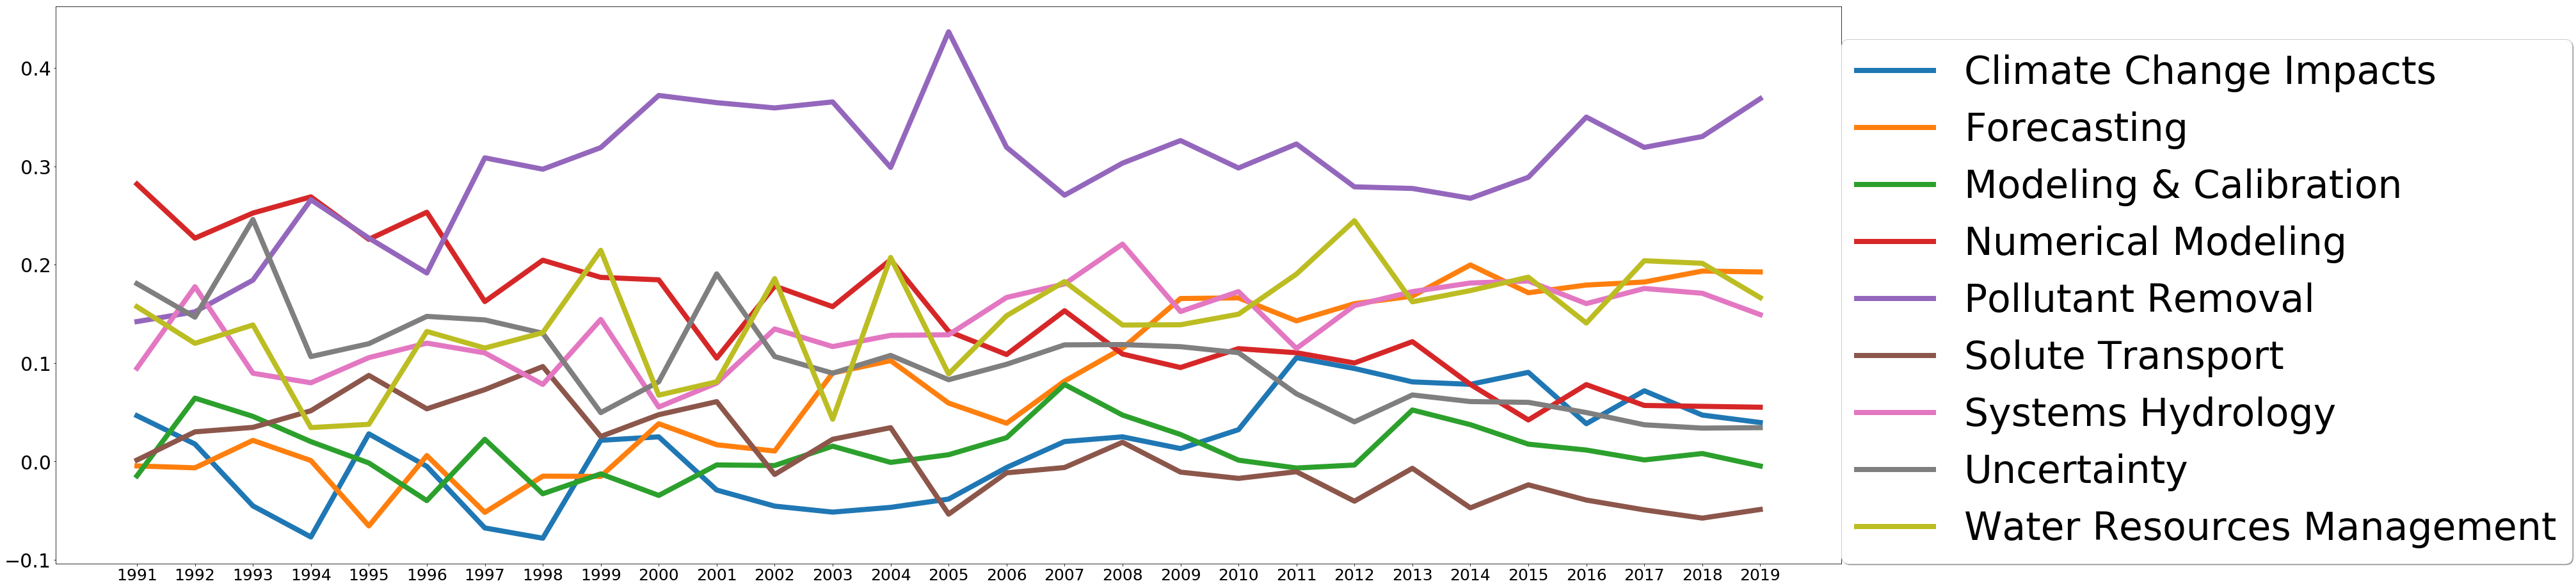

In [28]:
df = pd.DataFrame(isolated_dict).transpose()
plt.figure(figsize=(50,16))
plt.plot(df[:-1], linewidth = 8)
plt.xticks(size = 25)
plt.yticks(size = 30)
plt.legend(df, prop={'size': 60}, loc =(1,0), shadow = True, fancybox = True)

plt.savefig('figures/isolated_trend_dominance.png')


In [29]:
isolated_dict_journal = {}

for journal in journals:
    isolated_dict_journal[journal] = {}
    for isolated in isolated_list:
        isolated_dict_journal[journal][isolated] = journal_diversity_correlation_dict['shannon'][journal][isolated]


In [106]:
# fig = plt.figure(figsize=(50,25), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for journal in journals:
#     ax = fig.add_subplot(3, 6, plot_number)
#     ax.bar(isolated_list, isolated_dict_journal[journal].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=20)
#     ax.tick_params(axis="y", labelsize=10)
#     ax.set_ylim(-0.5,0.5)
#     ax.set_title(journal, size = 40)
#     plt.xticks(rotation=60)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1
# plt.savefig('figures/isolated_journal_shannon.png')

In [128]:
isolated_dict_global = {}

for metric in diversity_metrics:
    isolated_dict_global[metric] = {}
    for isolated in isolated_list:
        isolated_dict_global[metric][isolated] = r_vals_global[metric][isolated]


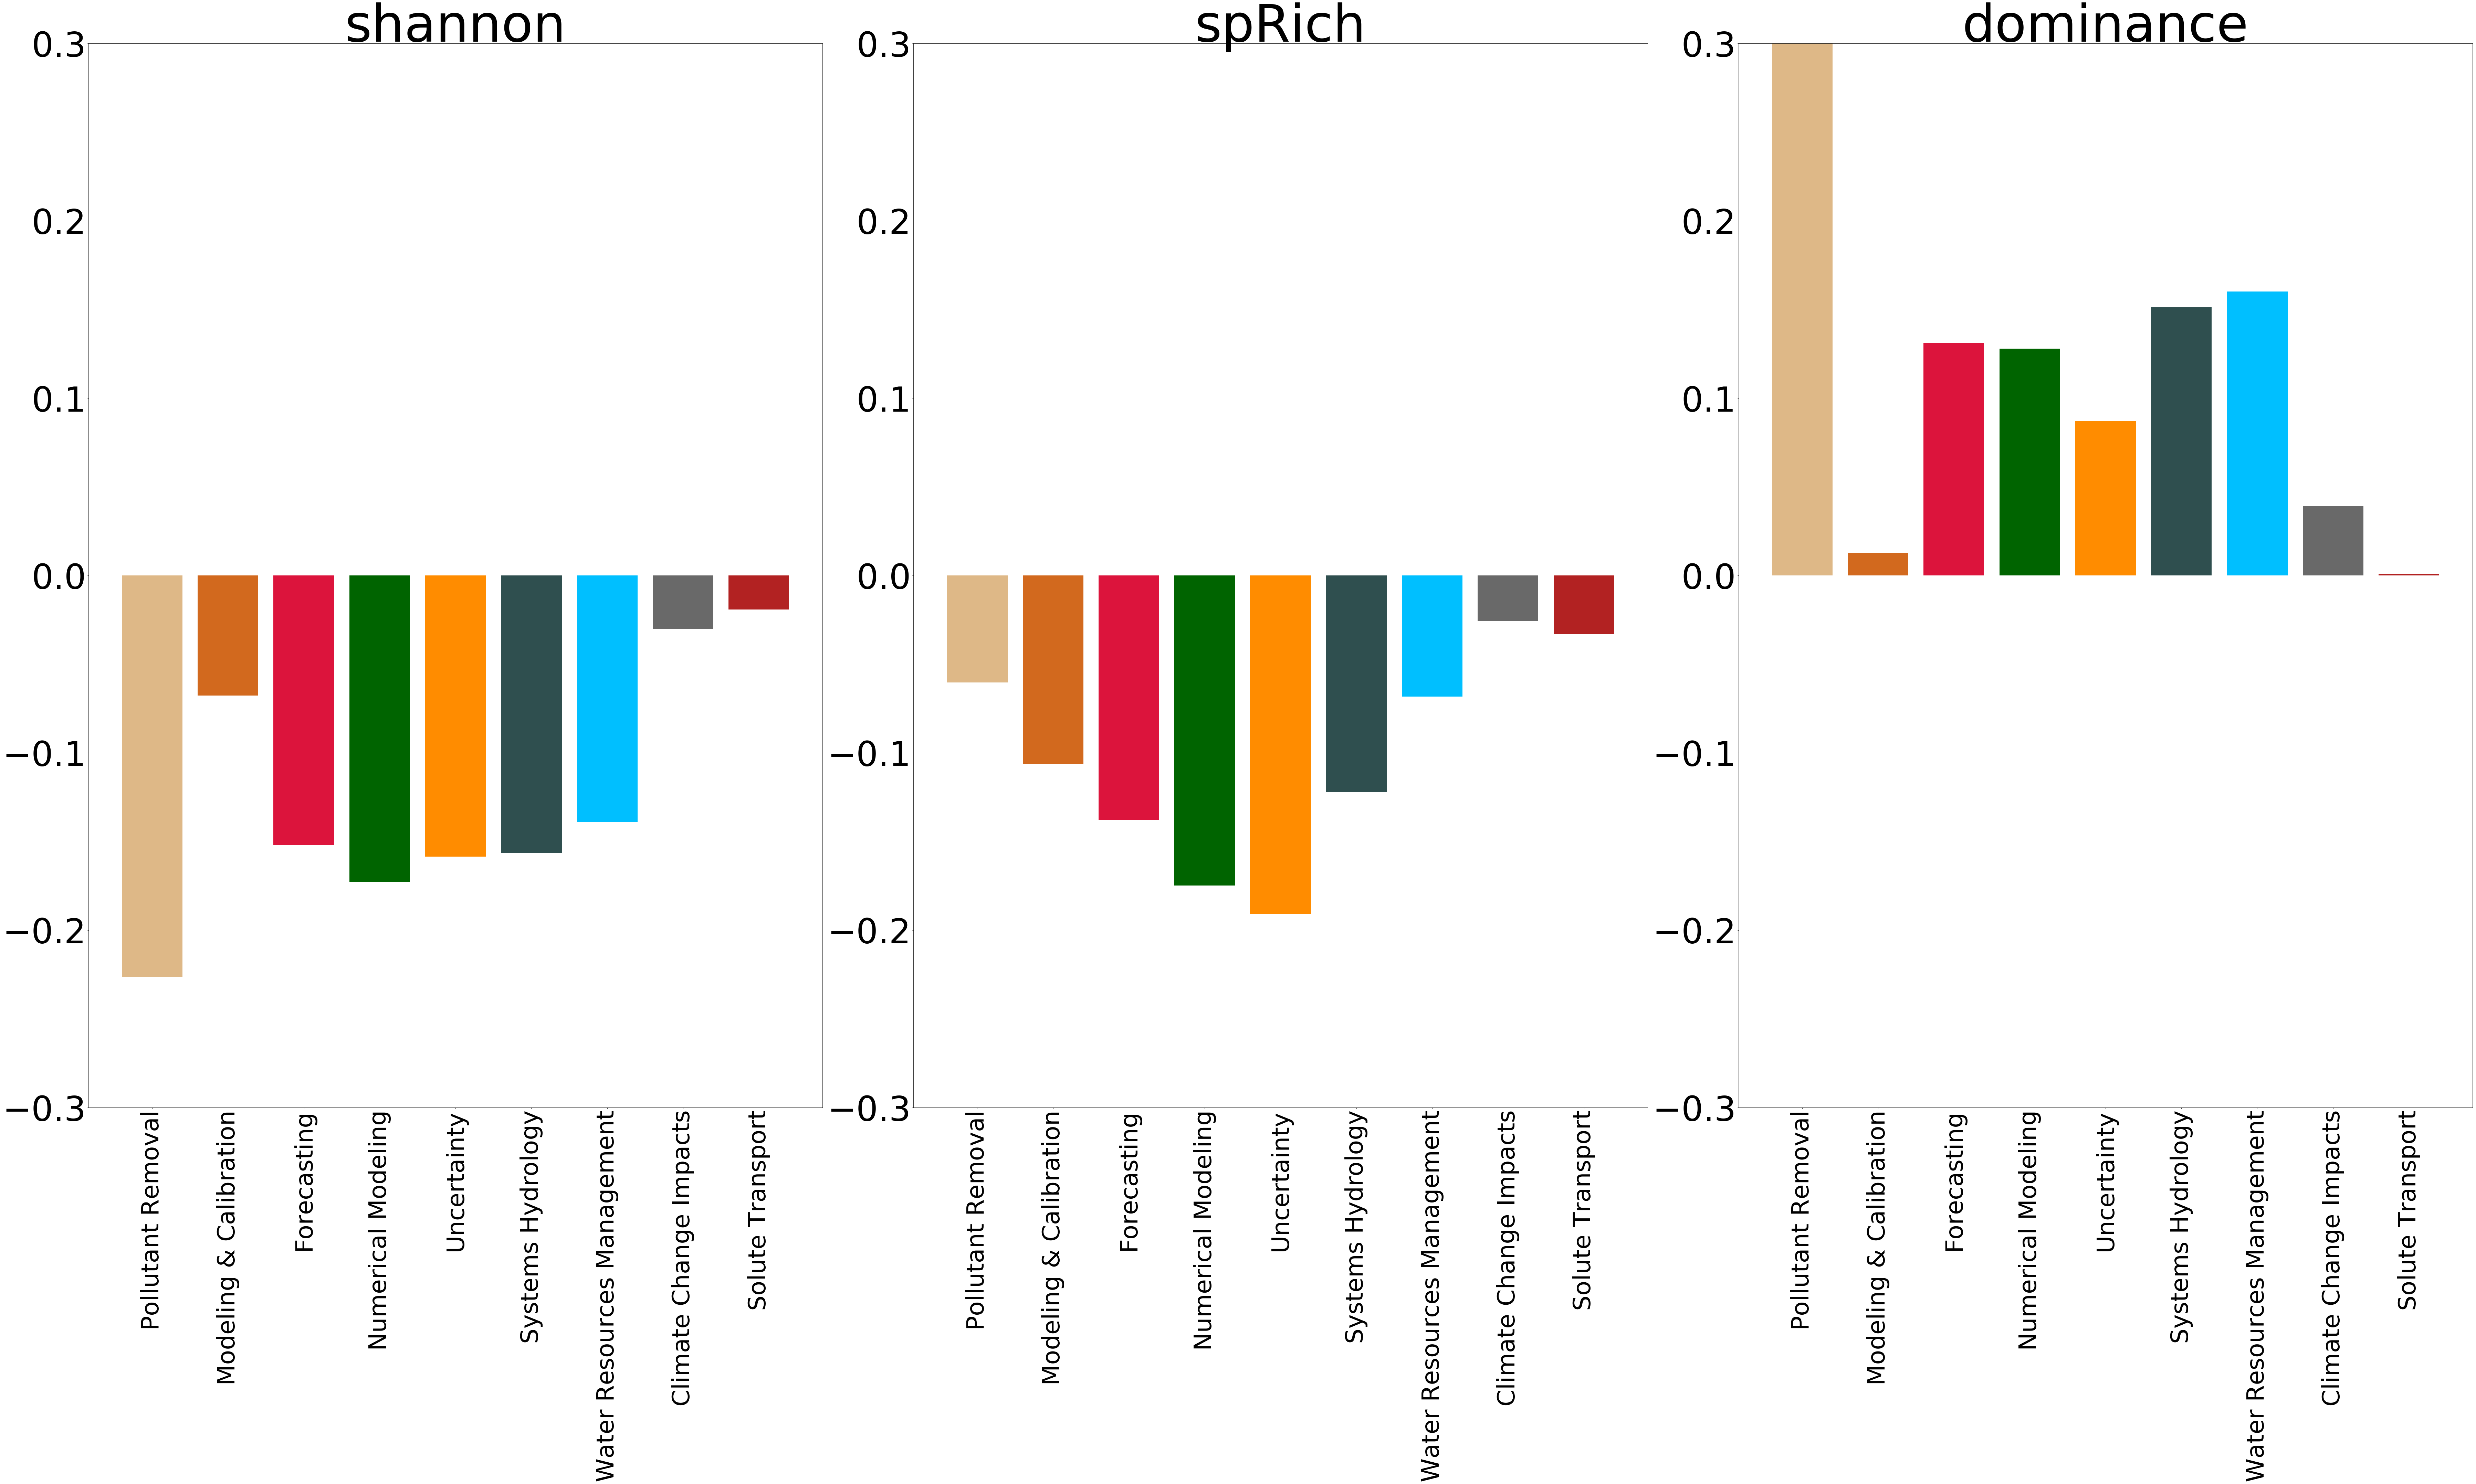

In [149]:
#plot r values for global diversity & topic distributions

fig = plt.figure(figsize=(100,60), facecolor='white')


# plot numbering starts at 1, not 0
plot_number = 1

for metric in diversity_metrics_3:
    ax = fig.add_subplot(1, 3, plot_number)
    ax.bar(isolated_list, isolated_dict_global[metric].values(), color = list(custom_colors.values()))
    ax.tick_params(axis="x", labelsize=70)
    ax.tick_params(axis="y", labelsize=100)
    ax.set_ylim(-0.3,0.3)
    ax.set_title(metric, size = 150)
    plt.xticks(rotation=90)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
    
plt.tight_layout()
plt.savefig('figures/r_global_isolated.png')    

In [126]:
#  fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for year in years:
#     ax = fig.add_subplot(6, 5, plot_number)
#     ax.bar(topic_names_short, year_diversity_correlation_dict['gini-simpson'][year].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=25)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.5)
#     ax.set_title(year, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_gini_allyears.png')   

In [ ]:
#  fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for year in years:
#     ax = fig.add_subplot(6, 5, plot_number)
#     ax.bar(topic_names_short, year_diversity_correlation_dict['spRich'][year].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=25)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.5)
#     ax.set_title(year, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_sprich_allyears.png')   

In [ ]:
#  fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for year in years:
#     ax = fig.add_subplot(6, 5, plot_number)
#     ax.bar(topic_names_short, year_diversity_correlation_dict['dominance'][year].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=25)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.5)
#     ax.set_title(year, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_dominance_allyears.png')   

In [ ]:
#Create a dictionary of [metric][journal][topic][weights]
# journal_year_diversity_correlation_dict = {}


    
# for metric in diversity_metrics:

#     journal_year_diversity_correlation_dict[metric] = {}
    
#     for journal in journals:
        
#         journal_year_diversity_correlation_dict[metric][journal] = {}
            
#         for y, year in enumerate(years):

#             journal_year_diversity_correlation_dict[metric][journal][year] = {} 

#             for t, topic in enumerate(topic_names):

#                 journal_year_diversity_correlation_dict[metric][journal][year][topic] = np.corrcoef(topic_distributions_journal_year[journal][year][:,t],year_diversity[metric][year])[0,1]
            